**Training a model to predict first 10 charcters of the Kannada aphebet**

In [128]:
from google.colab import files
files.upload()

Saving seg_test.zip to seg_test.zip


{'seg_test.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x006\x81\xbcP\xc2\x83\x87`\xe4\x1c\x00\x001\'\x00\x00\x12\x00\x00\x00seg_test/2 (1).png\xedzy<\xd4\xed\xf7\xf75c0\x08c\xc9:4R\xb2\x84Av\xc5\x8c\x90\xeckd\xbfe\x8b\x98\xec\x8a\x8c-\xe5\x8e\x8a\x94\xa4(E\x85\x9a\xb4\xd8\xc2\xe0VB\x96\xec\tS\xd9\x12\x9aH\x14\xe5w}\xdc\xcf\xdd\xfd\xfc\xee\xdf\xf7\xf9\xe3y\xfez\xfe\xb8{\xbdz\xf5\x99\xf39\xd7\xb9\xce9\xd7\xb9\xcey\x9f\xf3\xe9\xb4\xb5\xa5\t7\xa7\x18\'\x00\x80\xdbt\xdf^[\x0004\x00X\x92\xb1hH\xd9\xc3\xebQ\x06\xff\xe1\xa0\xecs\x0e\x03@\x98\x1f\xf9\x8b\xf2\xcb\x7f\x05\xb9\x00{\xb8\xa9\x85\x11\xfb\x00\xdb\xe6M\xdc\xe8\x98W\xaa\xfa\x90\xb45\xdc\xc8)\xdc0\xd4\xc7+< $\x98`\x1fp\xc4\x07\xa8\xaa(\xee\x8f\x08VT%\x125\t*\x9a:\xbb\xd4t\x88\xaa\x91\xd55\x02\x90{\x1b\xc2m\x17\xe2\x1b\x1e\xe5\x15\xea\x03,H\xf6\xe6$\xf2N\x82\xbd\xbf\x0f\xc1\xc2+\xdc?*$40l\'\xc14\xd8[\xa9\xfa\x0f\xdbN\x00\x08\xc0t/\xc9>:on\xe4ed\xa1\x13\x7f\x8a\x8d\xc2\x81\xdau\x85\x1e\x96\x81P\xbf\xa1\xf2d\x9c>\xdf\xd1\xaf\x92_ofS\xf8>\x1f=\xf

In [129]:
!unzip seg_test.zip

Archive:  seg_test.zip
  inflating: seg_test/2 (1).png      
  inflating: seg_test/img1_2_2.jpeg  
  inflating: seg_test/img1_2_3.jpeg  
  inflating: seg_test/img1_2_4.jpeg  
  inflating: seg_test/img1_2_5.jpeg  


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [80]:
train_dir='/content/new_dataset/train'
categories=os.listdir(train_dir)
categories

['s10', 's5', 's1', 's3', 's9', 's6', 's8', 's7', 's2', 's4']

In [103]:
train_gen = ImageDataGenerator(rescale=1./255)

img_shape=150

train_batches = train_gen.flow_from_directory(batch_size=10,
                                              directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_shape,img_shape),
                                                     class_mode='sparse')

Found 1001 images belonging to 10 classes.


In [104]:
val_gen = ImageDataGenerator(rescale=1./255)
val_dir='/content/new_dataset/val'
val_batches = val_gen.flow_from_directory(batch_size=10,
                                          directory = val_dir,
                                          shuffle=True,
                                          target_size=(img_shape,img_shape),
                                                     class_mode='sparse')

Found 250 images belonging to 10 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [86]:
train_batches.class_indices

{'s1': 0,
 's10': 1,
 's2': 2,
 's3': 3,
 's4': 4,
 's5': 5,
 's6': 6,
 's7': 7,
 's8': 8,
 's9': 9}

In [110]:
epochs=10
total_train = 1001
total_val = 250
Batch_size=10
history = model.fit(
    train_batches,
    steps_per_epoch=int(np.ceil(total_train / float(Batch_size))),
    epochs=epochs,
    validation_data=val_batches,
    validation_steps=int(np.ceil(total_val / float(Batch_size)))
)

Epoch 1/10
101/101 [==============================] - 6s 57ms/step - loss: 0.2585 - accuracy: 0.9131 - val_loss: 0.3451 - val_accuracy: 0.9200
Epoch 2/10
101/101 [==============================] - 6s 56ms/step - loss: 0.2868 - accuracy: 0.8981 - val_loss: 0.3674 - val_accuracy: 0.8880
Epoch 3/10
101/101 [==============================] - 6s 56ms/step - loss: 0.2280 - accuracy: 0.9331 - val_loss: 0.2880 - val_accuracy: 0.9320
Epoch 4/10
101/101 [==============================] - 6s 56ms/step - loss: 0.2507 - accuracy: 0.9081 - val_loss: 0.3339 - val_accuracy: 0.9160
Epoch 5/10
101/101 [==============================] - 6s 56ms/step - loss: 0.2338 - accuracy: 0.9161 - val_loss: 0.3406 - val_accuracy: 0.9160
Epoch 6/10
101/101 [==============================] - 6s 56ms/step - loss: 0.2288 - accuracy: 0.9161 - val_loss: 0.3440 - val_accuracy: 0.9160
Epoch 7/10
101/101 [==============================] - 6s 56ms/step - loss: 0.2331 - accuracy: 0.9141 - val_loss: 0.3641 - val_accuracy: 0.9080

In [0]:
test = cv2.imread('/content/seg_test/img1_2_5.jpeg')

img = cv2.resize(test,(150,150))

img = np.reshape(img,[1,150,150,3])

a=np.argmax(model.predict(img))

In [113]:
class_names = np.array(['ಅ','ಏ','ಆ','ಇ','ಈ','ಉ','ಊ','ಋ','ೠ','ಎ'])
class_names

array(['ಅ', 'ಏ', 'ಆ', 'ಇ', 'ಈ', 'ಉ', 'ಊ', 'ಋ', 'ೠ', 'ಎ'], dtype='<U1')

In [147]:
class_names[a]

'ಆ'

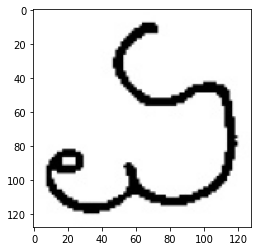

In [148]:
plt.imshow(test)

In [149]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 34, 34, 64)      

In [0]:
model.save("final_proj_try2.h5")